In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = pd.read_csv("/content/prepared_data.csv")
data.head()

,SMS_TEXT,ENGLISH_TEXT
0,"﻿U wan me to ""chop"" seat 4 u nt?",Do you want me to reserve seat for you or not?
1,Yup. U reaching. We order some durian pastry a...,Yeap. You reaching? We ordered some Durian pas...
2,They become more ex oredi... Mine is like 25.....,They become more expensive already. Mine is li...
3,I'm thai. what do u do?,I'm Thai. What do you do?
4,Hi! How did your week go? Haven heard from you...,Hi! How did your week go? Haven't heard from y...


<h2> UTILITY FUNCTIONS

In [ ]:
def show_dist_plot(target_variable,title):
  """
  this function is used to plot a density distribution graph for the target variable
  """  
  plt.figure(figsize=(15,10))
  sns.distplot(target_variable)
  plt.title(title)
  plt.show()

In [ ]:
def calculate_sentence_length(text):
  """
  This function is used to calculate the length of each sentence
  """
  sentence_lengths = []
  for sentence in text:
    sentence_lengths.append(len(sentence))
  return sentence_lengths   

In [ ]:
def calculate_no_of_words(text):
  """
  This function is used to calculate the number of words in each sentence
  """  
  no_of_words = []
  for sentence in text:
    no_of_words.append(len(sentence.split()))
  return no_of_words  

In [ ]:
def calculate_stop_words(text):
  """
  This function is used to calculate the frequency of each stop word
  """  
  stop_words_dict = dict.fromkeys(stop_words, 0)
  for each_sentence in text:
    for each_word in each_sentence.split():
      try:
        stop_words_dict[each_word]+=1
      except:
        pass  
  stop_words_dict = sorted(stop_words_dict.items(),key=lambda x:x[1], reverse=True)[:25]      
  return stop_words_dict    

## **SMS TEXT**

<h2> 1. Sentence Length

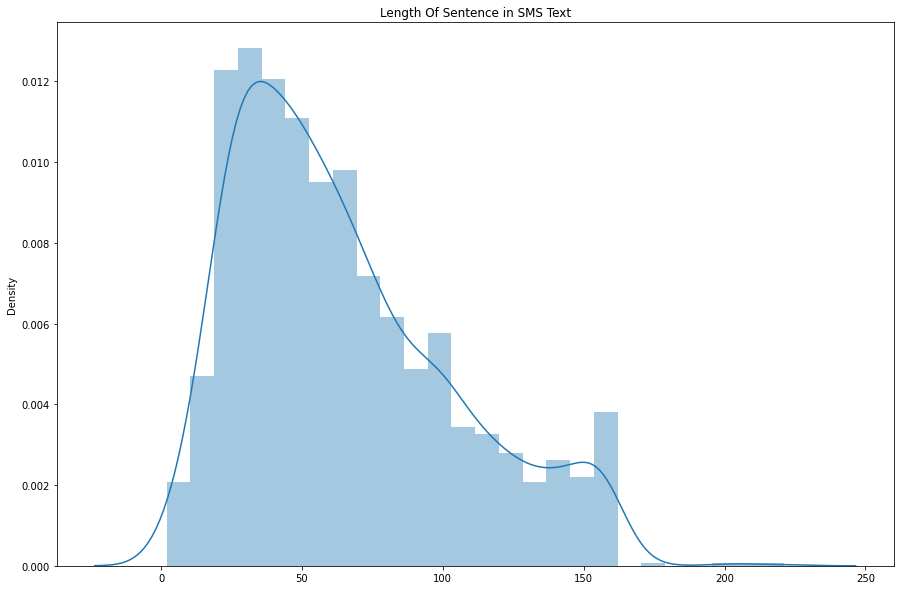

In [ ]:
# To check the desity distribution for sentence length
sentence_lengths = calculate_sentence_length(data['SMS_TEXT'])
show_dist_plot(sentence_lengths,"Length Of Sentence in SMS Text")

Observations - 


---


*   The above plot shows a density distribution for sentence length in sms texts.
*   We can see that most number of sms texts have a length of around 30-70.
*   Very few sentences have a length between 150 to 170.






# 2. Calculating the Percentile Values for Sentence Length

In [ ]:
for i in range(0,101,10):
  print(i,"th percentile value",np.percentile(sentence_lengths,i))

0 th percentile value 2.0
10 th percentile value 22.0
20 th percentile value 30.0
30 th percentile value 38.0
40 th percentile value 47.0
50 th percentile value 56.0
60 th percentile value 66.0
70 th percentile value 79.0
80 th percentile value 99.0
90 th percentile value 125.0
100 th percentile value 221.0


In [ ]:
# Printing all the percentile values from 90 to 100
for i in range(90,101,1):
  print(i,"th percentile value",np.percentile(sentence_lengths,i))

90 th percentile value 125.0
91 th percentile value 129.0
92 th percentile value 134.0
93 th percentile value 138.0
94 th percentile value 142.0
95 th percentile value 147.0
96 th percentile value 151.0
97 th percentile value 154.0
98 th percentile value 157.0
99 th percentile value 159.0
100 th percentile value 221.0


In [ ]:
# Printing all the percentile values from 99 to 100
from numpy import arange
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
  print(i,"th percentile value",np.percentile(sentence_lengths,i))

99.1 th percentile value 159.0
99.2 th percentile value 159.00800000000004
99.3 th percentile value 160.0
99.4 th percentile value 160.0
99.5 th percentile value 160.0
99.6 th percentile value 160.0
99.7 th percentile value 160.0
99.8 th percentile value 161.01999999999953
99.9 th percentile value 202.0030000000006
100 th percentile value 221.0


Observations - 


---
From above the above percentile values we can see that from 99.1 to 99.8 there is a constant incease in the value but from 99.8 to 99.9 there is sudden increase in the value. This can be considered as an outlier for our dataset and thus we could only keep sms texts with sentence length =< 161


In [ ]:
# Checking the number of sentences in SMS texts which have a sentence of length of more than 161 and less than 202
count = 0
for index,val in enumerate(sentence_lengths):
  if val > 161 and val <= 202:
     count += 1

print("Total number of SMS texts which have a sentence length of more than 161 and less than 202 - ",count)     

Total number of SMS texts which have a sentence length of more than 161 and less than 202 -  2


In [ ]:
# Checking the number of sentences in SMS texts which have a sentence of length of more than 202 and less than 221
count = 0
for index,val in enumerate(sentence_lengths):
  if val > 202 and val <= 221:
     count += 1

print("Total number of SMS texts which have a sentence length of more than 202 and less than 221 - ",count)     

Total number of SMS texts which have a sentence length of more than 202 and less than 221 -  2


<h2> 3. Number of Words 

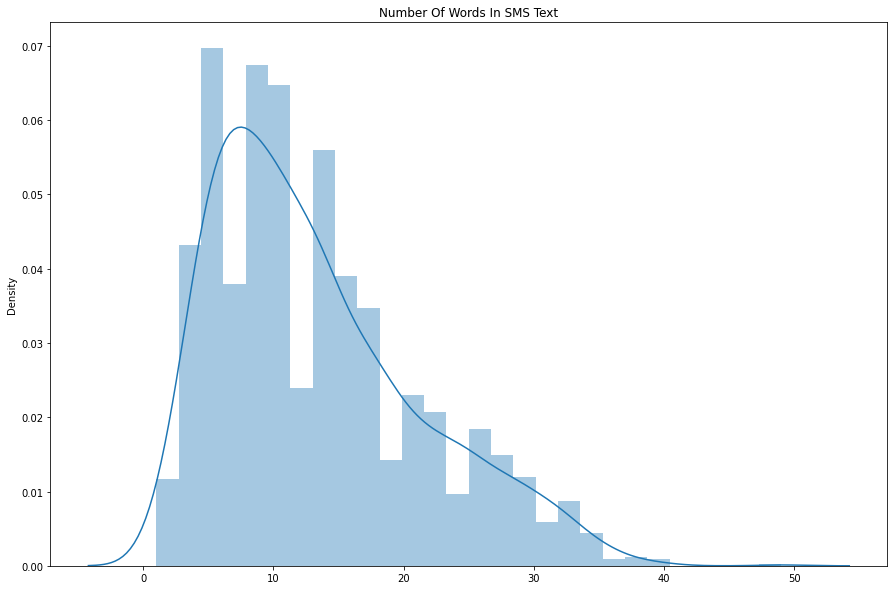

In [ ]:
# To check the desity distribution for number of words
no_of_words = calculate_no_of_words(data['SMS_TEXT'])
show_dist_plot(no_of_words,"Number Of Words In SMS Text")

Observations - 


---


*   The above plot shows the density distribution for number of words in SMS texts.
*   Most sentences have words between 5 to 15. 
*   Very less number of sentences have words more than 30.






# 4. Calculating the Percentile Values for Number Of Words

In [ ]:
for i in range(0,101,10):
  print(i,"th percentile value",np.percentile(no_of_words,i))

0 th percentile value 1.0
10 th percentile value 5.0
20 th percentile value 6.0
30 th percentile value 8.0
40 th percentile value 10.0
50 th percentile value 11.0
60 th percentile value 13.399999999999864
70 th percentile value 16.0
80 th percentile value 20.0
90 th percentile value 25.0
100 th percentile value 49.0


In [ ]:
# Printing all the percentile values from 90 to 100
for i in range(90,101,1):
  print(i,"th percentile value",np.percentile(no_of_words,i))

90 th percentile value 25.0
91 th percentile value 26.0
92 th percentile value 27.0
93 th percentile value 28.0
94 th percentile value 28.0
95 th percentile value 29.0
96 th percentile value 30.0
97 th percentile value 31.0
98 th percentile value 32.01999999999998
99 th percentile value 34.0
100 th percentile value 49.0


In [ ]:
# Printing all the percentile values from 99 to 100
from numpy import arange
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
  print(i,"th percentile value",np.percentile(no_of_words,i))

99.1 th percentile value 35.0
99.2 th percentile value 35.0
99.3 th percentile value 35.0
99.4 th percentile value 35.0
99.5 th percentile value 36.0
99.6 th percentile value 36.003999999999905
99.7 th percentile value 37.0
99.8 th percentile value 37.003999999999905
99.9 th percentile value 39.001000000000204
100 th percentile value 49.0


In [ ]:
# Checking the number of sentences in SMS texts which have a number of words more than 39
count = 0
for index,val in enumerate(no_of_words):
  if val > 39:
     count = count + 1

print("Total number of SMS texts which have a sentence length which have a number of words more than 39 - ",count)     

Total number of SMS texts which have a sentence length which have a number of words more than 39 -  2


Observations - 


---



*   From the above percentile values we can see that 99th percentile value is 34 and 100th percentile value is 49.
*   We further look into percentile values from 99.1 upto 100.
We can see that 99.9th value is 39 which means 99.9 % of the sentences in SMS Text have 39 or less than 39 words.
*   We can thus ignore the SMS texts/sentences which have words more than 39 in count.





   





# 5. Top 25 frequently occuring stop words in the SMS TEXT

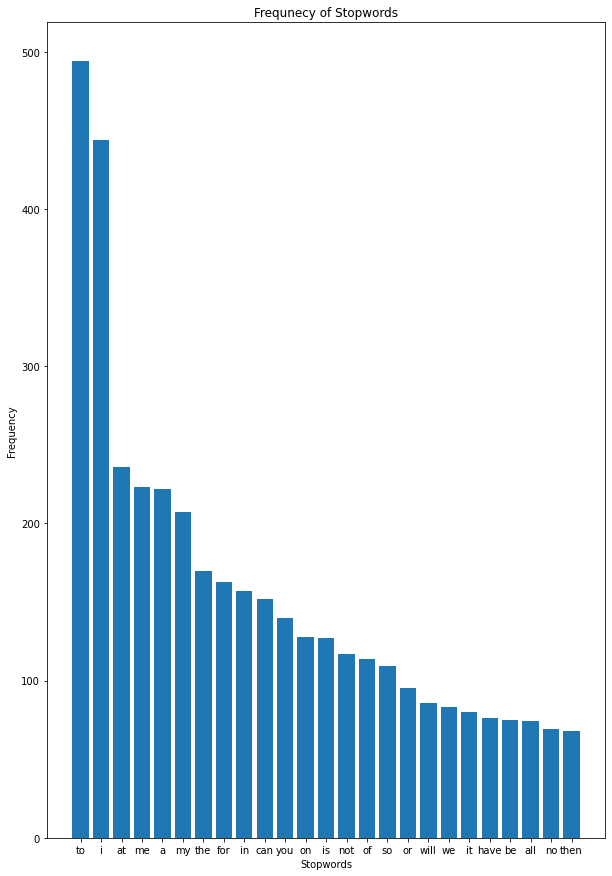

In [ ]:
import matplotlib.pyplot as plt

stop_word_dict = calculate_stop_words(data['SMS_TEXT'])
stop_words_list = []
counts = []
for stop_word,count in stop_word_dict:
  stop_words_list.append(stop_word)
  counts.append(count)

plt.figure(figsize=(10,15))
plt.xlabel("Stopwords")
plt.ylabel("Frequency")
plt.title("Frequnecy of Stopwords")
plt.bar(range(len(stop_word_dict)), counts, tick_label=stop_words_list)
plt.show()  

Obsevations - 


---


*   Among all the stop words "to" is the most frquently used stopword.
*   Among the top 25 frequently used, "if" is least used.




# **STANDARD ENGLISH TEXT**

<h2> 1. Sentence Length

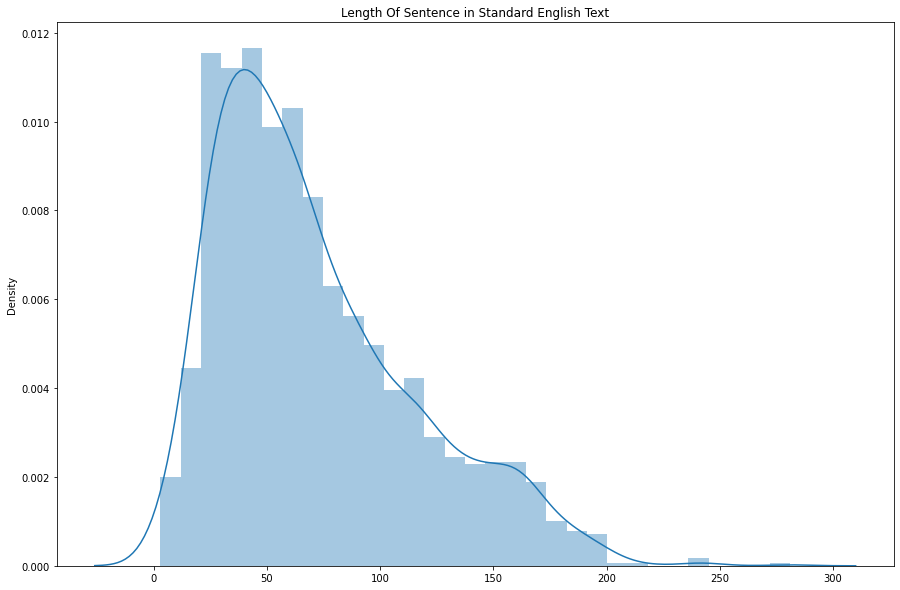

In [ ]:
# To check the desity distribution for sentence length
sentence_lengths = calculate_sentence_length(data['ENGLISH_TEXT'])
show_dist_plot(sentence_lengths,"Length Of Sentence in Standard English Text")

Observations - 


---


*   The above plot shows a density distribution for sentence length in sms texts.
*   We can see that most number of standard english texts have a length of around 30-70.
*   Very few sentences have a length between 150 to 170.






# 2. Calculating the Percentile Values for Sentence Length

In [ ]:
for i in range(0,101,10):
  print(i,"th percentile value",np.percentile(sentence_lengths,i))

0 th percentile value 3.0
10 th percentile value 25.0
20 th percentile value 33.0
30 th percentile value 42.0
40 th percentile value 50.0
50 th percentile value 61.0
60 th percentile value 72.0
70 th percentile value 87.0
80 th percentile value 108.20000000000005
90 th percentile value 140.0
100 th percentile value 281.0


In [ ]:
# Printing all the percentile values from 90 to 100
for i in range(90,101,1):
  print(i,"th percentile value",np.percentile(sentence_lengths,i))

90 th percentile value 140.0
91 th percentile value 144.0
92 th percentile value 149.0
93 th percentile value 154.0
94 th percentile value 156.0
95 th percentile value 162.0
96 th percentile value 165.0
97 th percentile value 170.0
98 th percentile value 179.01999999999998
99 th percentile value 190.01
100 th percentile value 281.0


In [ ]:
# Printing all the percentile values from 99 to 100
from numpy import arange
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
  print(i,"th percentile value",np.percentile(sentence_lengths,i))

99.1 th percentile value 192.0
99.2 th percentile value 192.01600000000008
99.3 th percentile value 196.00700000000006
99.4 th percentile value 197.0
99.5 th percentile value 198.00499999999988
99.6 th percentile value 200.0
99.7 th percentile value 200.0209999999995
99.8 th percentile value 215.04999999999882
99.9 th percentile value 241.0030000000006
100 th percentile value 281.0


In [ ]:
# Checking the number of sentences in Standard English texts which have a sentence of length of more than 200
count = 0
for index,val in enumerate(sentence_lengths):
  if val > 200 :
     count += 1

print("Total number of Standard English texts which have a sentence length of more than 200 - ",count)     

Total number of Standard English texts which have a sentence length of more than 200 -  6


In [ ]:
# Checking the number of sentences in Standard English texts which have a sentence of length of more than 215
count = 0
for index,val in enumerate(sentence_lengths):
  if val > 215 :
     count += 1

print("Total number of Standard English texts which have a sentence length of more than 215 - ",count)

Total number of Standard English texts which have a sentence length of more than 215 -  4


In [ ]:
# Checking the number of sentences in Standard English texts which have a sentence of length of more than 241
count = 0
for index,val in enumerate(sentence_lengths):
  if val > 241 :
     count += 1

print("Total number of Standard English texts which have a sentence length of more than 242 - ",count)

Total number of Standard English texts which have a sentence length of more than 242 -  2


Observations - 


---


*   From the above percentile values we can see that the 99.7th percentile value is 200.
*   We just have around 6 sentences with sentence length between 200 and 281.
*   Thus, we can keep the maximum sentence length as 200 and remove the rest of the sentences before we start preprocessing.






<h2> 3. Number of Words 

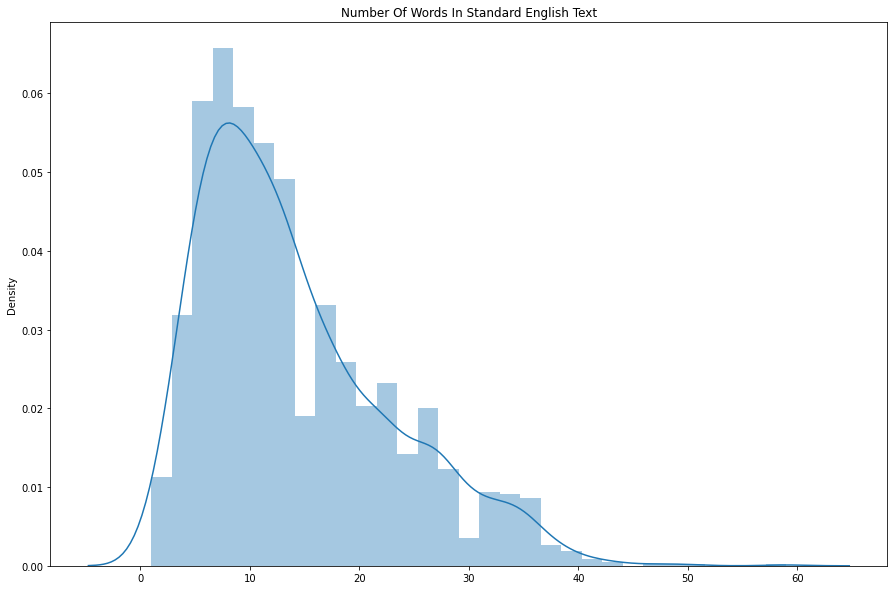

In [ ]:
# To check the desity distribution for number of words
no_of_words = calculate_no_of_words(data['ENGLISH_TEXT'])
show_dist_plot(no_of_words,"Number Of Words In Standard English Text")

Observations - 


---


*   The above plot shows the density distribution for number of words in Standard English texts.
*   Most sentences have words between 5 to 15. 
*   Very less number of sentences have words more than 30.






# 4. Calculating the Percentile Values for Number Of Words

In [ ]:
for i in range(0,101,10):
  print(i,"th percentile value",np.percentile(no_of_words,i))

0 th percentile value 1.0
10 th percentile value 5.0
20 th percentile value 7.0
30 th percentile value 8.0
40 th percentile value 10.0
50 th percentile value 12.0
60 th percentile value 14.0
70 th percentile value 17.0
80 th percentile value 22.0
90 th percentile value 27.0
100 th percentile value 59.0


In [ ]:
# Printing all the percentile values from 90 to 100
for i in range(90,101,1):
  print(i,"th percentile value",np.percentile(no_of_words,i))

90 th percentile value 27.0
91 th percentile value 28.0
92 th percentile value 29.0
93 th percentile value 29.070000000000164
94 th percentile value 31.0
95 th percentile value 32.0
96 th percentile value 33.0
97 th percentile value 34.0
98 th percentile value 35.01999999999998
99 th percentile value 38.0
100 th percentile value 59.0


In [ ]:
# Printing all the percentile values from 99 to 100
from numpy import arange
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
  print(i,"th percentile value",np.percentile(no_of_words,i))

99.1 th percentile value 38.0
99.2 th percentile value 38.00800000000004
99.3 th percentile value 39.0
99.4 th percentile value 39.0
99.5 th percentile value 40.0
99.6 th percentile value 41.003999999999905
99.7 th percentile value 42.00299999999993
99.8 th percentile value 43.00599999999986
99.9 th percentile value 48.00200000000041
100 th percentile value 59.0


In [ ]:
# Checking the number of sentences in Standard English texts which have a number of words more than 48
count = 0
for index,val in enumerate(no_of_words):
  if val > 48:
     count = count + 1

print("Total number of Standard English texts which have a sentence length which have a number of words more than 48 - ",count)     

Total number of Standard English texts which have a sentence length which have a number of words more than 48 -  2


Observations - 


---


*   The 99.9th percentile value is 48 which means most of the standard English sentences have 48 or less than 48 number of words.
*   We can thus filter out the data if the standard English sentences have more than 48 words while preprocessing.




# 5. Top 25 frequently occuring stop words in the Standard English TEXT

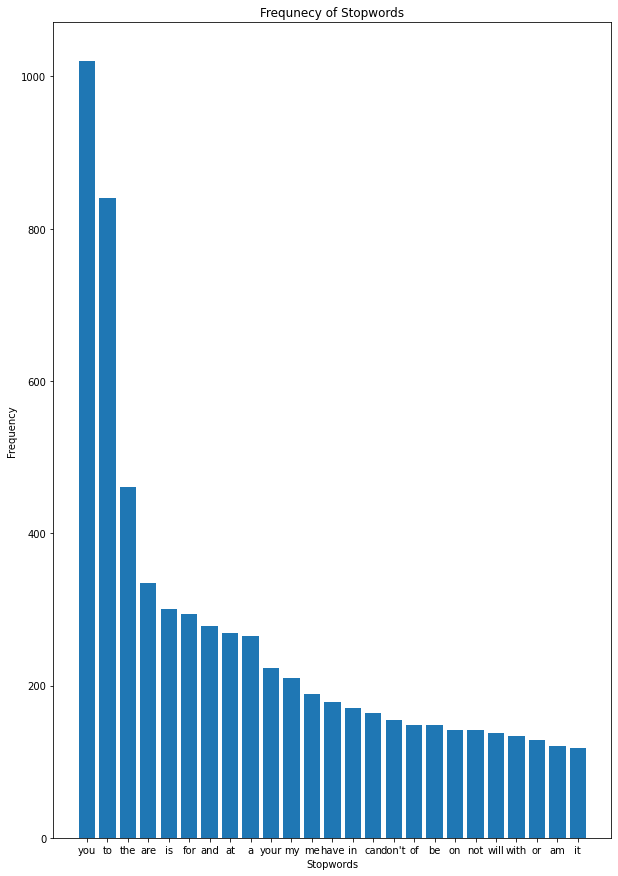

In [ ]:
import matplotlib.pyplot as plt

stop_word_dict = calculate_stop_words(data['ENGLISH_TEXT'])
stop_words_list = []
counts = []
for stop_word,count in stop_word_dict:
  stop_words_list.append(stop_word)
  counts.append(count)

plt.figure(figsize=(10,15))
plt.xlabel("Stopwords")
plt.ylabel("Frequency")
plt.title("Frequnecy of Stopwords")
plt.bar(range(len(stop_word_dict)), counts, tick_label=stop_words_list)
plt.show()  

Obsevations - 


---


*   Among all the stop words "you" is the most frquently used stopword.
*   Among the top 25 frequently used, "it" is least used.


